In [73]:
import numpy as np
import time
import FAFA05_module as glab
import matplotlib.pyplot as plt
import importlib
importlib.reload(glab)

%matplotlib notebook

#load module
test_module = glab.FAFA05_module(attenuator='al')

#get channel number array 
channels = test_module.get_channels()

#persistent containers
experiments = {}
peak_sums = []

start_ch = 810
end_ch = 990

#mass test
num_exp = 40
max_thickness = 2.40
for i, thickness in enumerate(np.linspace(0.0, max_thickness, num_exp)):
    name = "exp"+str(i) #experiment name
    counts = test_module.simulate_attenuation(thickness, 10, randomize=True, animate=False)
    experiments[name] = [thickness, channels, counts]
    
    result = experiments[name]
    thickness = result[0]
    counts = result[2]
    peak_sum = test_module.get_peak_counts(counts, start_ch, end_ch, show_selection=False, plot_title=str(thickness))
    peak_sums.append([name, thickness, peak_sum])
#     break
    
#print(peak_sums)    
    
#get linear relationship
peak_sums_data = np.array([list(row[1:]) for row in peak_sums])
peak_sums = np.array(peak_sums) # to be able to use boolean indexing

I = peak_sums_data[:,1]
th = peak_sums_data[:,0]

# log counts
I_log_idx = I > 0.0
if np.any(I_log_idx == False):
    skipped_experiments_str = "Intensity zero, skipping: " + ", ".join([row[0] for row in peak_sums[I_log_idx == False]])
    print(skipped_experiments_str)
I_log = np.log(I[I_log_idx])
th_log = th[I_log_idx]




Intensity zero, skipping: exp5, exp6, exp7, exp8, exp9, exp10, exp11, exp12, exp13, exp14, exp15, exp16, exp17, exp18, exp19, exp20, exp21, exp22, exp23, exp24, exp25, exp26, exp27, exp28, exp29, exp30, exp31, exp32, exp33, exp34, exp35, exp36, exp37, exp38, exp39


[-23.59524608   8.62467896]
HVL: 0.029376560782062258 m


<IPython.core.display.Javascript object>


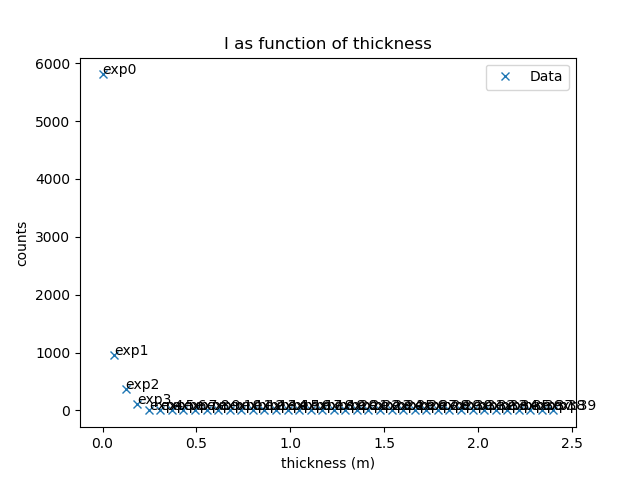

<IPython.core.display.Javascript object>


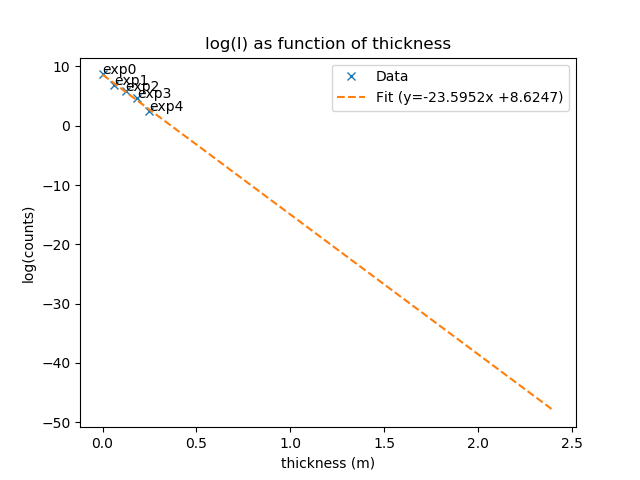

In [74]:
# get lin. eq. parameters
p = np.polyfit(th_log, I_log, 1)
print(p)

th_50 = np.log(2) / -p[0] 
print("HVL:", th_50, "m")
# make linear relationship x and y values for plotting
th_poly = th
I_poly = np.polyval(p, th_poly)

# plot lin figure
plt.figure()
plt.plot(th, I, 'x')
plt.title("I as function of thickness")
plt.xlabel("thickness (m)")
plt.ylabel("counts")
plt.legend(["Data"])
for i, exp in enumerate(peak_sums):
    plt.annotate(exp[0], (th[i], I[i]))
plt.show()

#plot log figure
plt.figure()
plt.plot(th_log, I_log, 'x')
plt.plot(th_poly, I_poly, '--')
plt.title("log(I) as function of thickness")
plt.xlabel("thickness (m)")
plt.ylabel("log(counts)")
plt.legend(["Data", "Fit (y="+"{:.4f}".format(p[0])+"x +"+"{:.4f}".format(p[1])+")"])
for i, exp in enumerate(peak_sums[I_log_idx]):
    plt.annotate(exp[0], (th_log[i], I_log[i]))    
plt.show()

In [52]:
test_module.get_available_attenuators()

List of elements included in data: 
----------------------------------
1: H (hydrogen)
2: He (helium)
3: Li (lithium)
4: Be (beryllium)
5: B (boron)
6: C (graphite)
7: N (nitrogen)
8: O (oxygen)
9: F (fluorine)
10: Ne (neon)
11: Na (sodium)
12: Mg (magnesium)
13: Al (aluminum)
14: Si (siliconsilicon)
15: P (phosphorus)
16: S (sulfur)
17: Cl (chlorine)
18: Ar (argon)
19: K (potassium)
20: Ca (calcium)
21: Sc (scandium)
22: Ti (titanium)
23: V (vanadium)
24: Cr (chromium)
25: Mn (manganese)
26: Fe (iron)
27: Co (cobalt)
28: Ni (nickel)
29: Cu (copper)
30: Zn (zinc)
31: Ga (gallium)
32: Ge (germanium)
33: As (arsenic)
34: Se (selenium)
35: Br (bromine)
36: Kr (krypton)
37: Rb (rubidium)
38: Sr (strontium)
39: Y (yttrium)
40: Zr (zirconium)
41: Nb (niobium)
42: Mo (molybdenum)
43: Tc (technetium)
44: Ru (ruthenium)
45: Rh (rhodium)
46: Pd (palladium)
47: Ag (silver)
48: Cd (cadmium)
49: In (indium)
50: Sn (tin)
51: Sb (antimony)
52: Te (tellurium)
53: I (iodine)
54: Xe (xenon)
55: Cs (cesi

# askdjhkf